In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
global df_pred,pred_all
from sklearn.externals import joblib

import sys
import warnings
pd.options.mode.chained_assignment = None 
from datetime import datetime


In [58]:
def predictor_mean(model0_1,modelo_2,X_set):  
    #aplicamos los predict
    forecast_q = model0_1.predict(X_set) 
    forecast = modelo_2.predict(X_set)
   #generamos una lista dummy: 
    forecast_mean = forecast 
    
    for i in range(len(X_set)):
        if  forecast[i] < 135:
            forecast_mean[i] = forecast[i]
        elif  forecast_q[i] > 160:
            forecast_mean[i] = forecast_q[i]
        if  130 < forecast_q[i] <155 and 130 < forecast[i] < 155:
            forecast_mean[i] = (0.3*forecast_q[i] + 0.7*forecast[i])
        if  140 < forecast_q[i] <160 and 140 < forecast[i] < 160:
            forecast_mean[i] = (forecast_q[i] + forecast[i])/2
    return forecast_mean

In [59]:
conta ="O3"
df_predict = pd.read_csv(path_inicial + conta +'.csv')


In [60]:
df_predict

,O3_47.0_max,TMP_45.0_mean,O3_2.0_mean,RH_45.0_mean,RH_2.0_mean,RH_25.0_min,O3_23.0_mean,RH_44.0_min,RH_25.0_mean,RH_23.0_max,...,WSP_mean_frcst_15,WSP_mean_frcst_16,TMP_mean_frcst_1,TMP_mean_frcst_2,TMP_mean_frcst_3,TMP_mean_frcst_21,TMP_mean_frcst_22,TMP_mean_frcst_23,TMP_mean_frcst_24,fecha
0,31.0,13.904762,26.954545,71.190476,53.611111,42.0,15.416667,65.0,51.363636,72.0,...,3.076923,3.219231,15.200000,14.350000,13.650000,18.526316,17.894737,17.105263,16.450000,2019-09-01 00:00:00
1,37.0,14.952381,28.869565,69.428571,48.473684,39.0,18.040000,63.0,48.571429,69.0,...,2.788462,3.076923,15.842105,15.200000,14.350000,19.888889,18.526316,17.894737,17.105263,2019-08-31 23:00:00
2,45.0,15.200000,32.818182,69.100000,41.210526,37.0,18.400000,56.0,46.409091,68.0,...,2.411538,2.788462,16.526316,15.842105,15.200000,21.800000,19.888889,18.526316,17.894737,2019-08-31 22:00:00
3,50.0,16.100000,42.333333,65.350000,31.578947,30.0,21.333333,62.0,45.428571,62.0,...,2.096154,2.411538,17.388889,16.526316,15.842105,24.190476,21.800000,19.888889,18.526316,2019-08-31 21:00:00
4,53.0,16.636364,52.565217,62.409091,23.736842,26.0,24.720000,57.0,41.863636,60.0,...,1.880769,2.096154,18.526316,17.388889,16.526316,25.095238,24.190476,21.800000,19.888889,2019-08-31 20:00:00
5,50.0,17.444444,60.166667,60.500000,19.789474,21.0,31.043478,38.0,36.909091,61.0,...,1.757692,1.880769,20.210526,18.526316,17.388889,24.952381,25.095238,24.190476,21.800000,2019-08-31 19:00:00
6,70.0,17.736842,68.916667,60.500000,17.380952,19.0,39.760000,44.0,30.772727,60.0,...,1.688462,1.757692,22.157895,20.210526,18.526316,24.571429,24.952381,25.095238,24.190476,2019-08-31 18:00:00
7,76.0,19.050000,74.458333,57.200000,18.000000,18.0,49.800000,47.0,28.727273,50.0,...,1.292308,1.688462,24.157895,22.157895,20.210526,23.571429,24.571429,24.952381,25.095238,2019-08-31 17:00:00
8,107.0,20.619048,74.208333,49.285714,19.714286,20.0,67.160000,39.0,29.000000,41.0,...,1.154167,1.292308,25.105263,24.157895,22.157895,22.285714,23.571429,24.571429,24.952381,2019-08-31 16:00:00
9,117.0,23.666667,66.958333,33.857143,24.047619,19.0,83.520000,33.0,29.681818,39.0,...,1.170833,1.154167,25.300000,25.105263,24.157895,20.809524,22.285714,23.571429,24.571429,2019-08-31 15:00:00


In [61]:
def prediccion(target,conta):
    #cargamos el DF
    df_predict = pd.read_csv(path_inicial + conta +'.csv')
    df_predict_fechas = pd.read_csv(path_inicial + conta +'.csv')
    
    df_predict = df_predict.sort_values(['fecha'], ascending=[0]).reset_index(drop=True)
    df_predict_fechas = df_predict_fechas.sort_values(['fecha'], ascending=[0]).reset_index(drop=True)


    df_fechas = df_predict["fecha"]
    df_predict.drop(["fecha"],inplace=True,axis=1)

    #cargamos los modelos
    model = [0 for col in range(25)]
    for i in range(0,24):
        model[i] = joblib.load(str(dirección_modelos + conta +'/' + conta+'_'+str(i+1)+'hora.pkl'))
        
    #hacemos el predict
    df_pronosticados = df_predict.copy()

    for i in range(0,24):
        df_pronosticados[target + str(i+1)] = model[i].predict(df_predict)
        
    
    #guardamos los valores pronosticados
    pred = []
    for i in range(1,25):
        #pred.append(df_pronosticados[str(target+str(i))].head(1).values[0])
        pred.append(df_pronosticados.loc[24:24,str(target+str(i))].values[0])

    df_pronosticados["fecha"] = df_fechas

    ## predict de las últimas 12 horas
    df_predict_historico = df_pronosticados[["fecha",target+'12']].copy()

    if conta == "PM10":
        df_predict_historico["PM10mean_max_frcst_12"] = df_predict_historico['PM10mean_max_frcst_12'].shift(-12)
        df_predict_historico = df_predict_historico.tail(-24)
    elif conta == "O3":
        df_predict_historico['O3_max_frcst_12'] = df_predict_historico['O3_max_frcst_12'].shift(-12)
        df_predict_historico = df_predict_historico.tail(-24)
    else: print("ERROR")
        


    df_predict_historico = df_predict_historico[["fecha",target+'12']].dropna()
    df_predict_historico.rename(columns={target+'12': conta+ '_pron_a_12hrs'}, inplace=True)
    
    #predict 12 horas
    df_pred =  pd.DataFrame(columns=["pred_0"])
    for i in range(0,24):
        df_pred[str("pred_"+str(i))] = [pred[i]]

        
        
    for i in range(0,24):
        df_pred.loc[i,conta+'_pronóstico'] = df_pred.iloc[0,i]
    for i in range(0,24):
        df_pred.loc[i,'fecha'] = pd.date_range(df_fechas[24], periods=25, freq='H').tolist()[i+1]
        df_pred = df_pred[[conta+"_pronóstico","fecha"]]
            
    if conta == "PM10":
        df_predict = df_predict_fechas[["fecha","PM10mean_mean","PM10_max","PM10_mean","PM10mean_max"]]
    elif conta == "O3":
        df_predict = df_predict_fechas[["fecha",'TMP_min','TMP_max',
                                            'O3_max','O3_mean','O3_min','TMP_mean']]
    else: print("ERROR")
        
    df_pred['fecha'] = df_pred['fecha'].astype(str)
    
    
    return  df_predict_historico,df_predict,df_pred

Ejecutamos la función:

In [62]:
dirección_modelos = "/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/entrenamiento_sin_persistencia/modelos/"
path_final = "./datos/datos_pau.csv"
path_inicial = "./datos/ingesta_modelos_"

In [63]:
target1 = "PM10mean_max_frcst_"
conta1 = 'PM10'
target2 = "O3_max_frcst_"
conta2 = 'O3'
target = "O3_max_frcst_"
conta = 'O3'

In [64]:
df_pred_O3

,O3_pronóstico,fecha
0,89.853752,2019-08-02 13:00:00
1,98.208481,2019-08-02 14:00:00
2,108.288460,2019-08-02 15:00:00
3,93.161247,2019-08-02 16:00:00
4,84.995811,2019-08-02 17:00:00
5,72.058525,2019-08-02 18:00:00
6,62.471828,2019-08-02 19:00:00
7,54.321243,2019-08-02 20:00:00
8,56.102154,2019-08-02 21:00:00
9,50.382191,2019-08-02 22:00:00


In [66]:
df_predict_historico_O3,df_predict_O3,df_pred_O3  = prediccion(target2,conta2)

[14:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [67]:
df_predict_historico_PM10,df_predict_PM10,df_pred_PM10 = prediccion(target1,conta1)

[14:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:12:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [68]:
df_export = pd.concat([df_predict_O3.set_index('fecha'),df_predict_PM10.set_index('fecha')], axis=1, join='inner').reset_index()

Juntamos los 3 archivos generados: historico, pronóstico 

In [69]:
df_pron_hist = pd.concat([df_predict_historico_O3.set_index('fecha'),df_predict_historico_PM10.set_index('fecha')], axis=1, join='inner').reset_index()

Juntamos los archivos de pronostico historico y el anterior

In [70]:
df_export = pd.merge(df_pron_hist, df_export, on='fecha',how="inner")

contatenamos el pronóstico de O3 y PM10

In [71]:
df_pronosticados = pd.concat([df_pred_O3.set_index('fecha'),df_pred_PM10.set_index('fecha')], axis=1, join='inner').reset_index()

Juntamos los archivos

In [72]:
df_export = pd.merge(df_pronosticados, df_export, on='fecha',how="outer")

In [73]:
df_export = df_export.sort_values(['fecha'], ascending=[0]).reset_index(drop=True)

#### exportamos

In [74]:
df_export.to_csv(path_final,sep=',', encoding='utf-8',index=False)

In [76]:
df_export.loc[23,"O3_pronóstico"]=df_export.loc[24,"O3_pron_a_12hrs"] 
df_export.loc[23,"PM10_pronóstico"]=df_export.loc[24,"PM10_pron_a_12hrs"] 

df_export.loc[24,"O3_pronóstico"]=df_export.loc[24,"O3_pron_a_12hrs"] 
df_export.loc[24,"PM10_pronóstico"]=df_export.loc[24,"PM10_pron_a_12hrs"] 

In [77]:
df_export['fecha'] =  pd.to_datetime(df_export['fecha'], format='%Y-%m-%d %H:%M')
#df_export.PM10_pronóstico = df_export.PM10_pronóstico

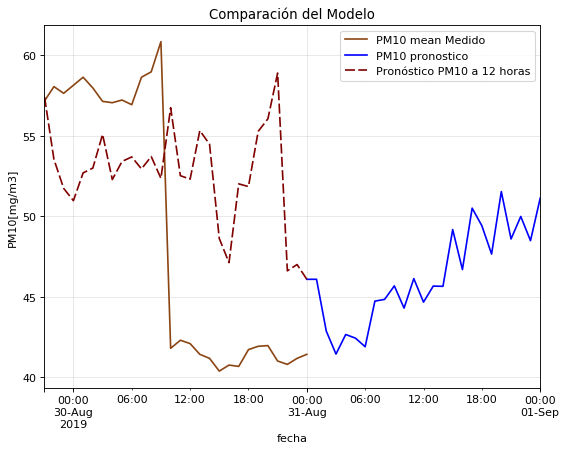

In [79]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.tail(60).head(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.tail(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

df_export.plot(x="fecha", y=[ "PM10mean_max"],ax=ax,label=["PM10 mean Medido"],color="saddlebrown")
df_export.plot(x="fecha", y=[ "PM10_pronóstico"],ax=ax,label=["PM10 pronostico"],color="blue")
df_export.plot(x="fecha", y=["PM10_pron_a_12hrs"],ax=ax,label=["Pronóstico PM10 a 12 horas"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)

now = datetime.now()
dt_string = now.strftime("%d/%m/%Y %H:%M").replace("/", "-")

plt.legend()
plt.show()

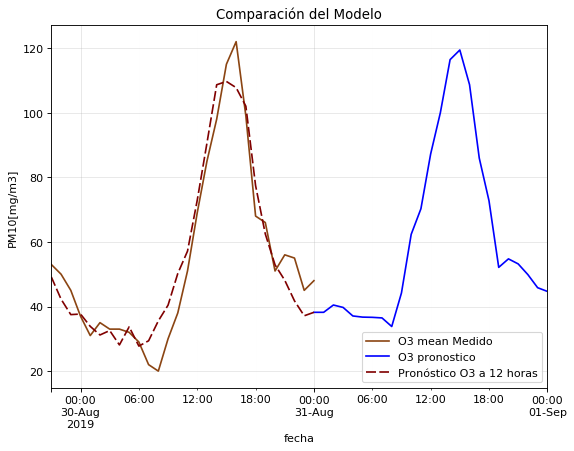

In [80]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

# df_export.(50).plot(x="fecha", y=[ "O3_y"],ax=ax,label=["O3 Medido"],color="dodgerblue")
# df_export.(60).head(100).plot(x="fecha", y=["O3_y_frcst_6"],ax=ax,label=["Pronóstico O3 a 12 horas"],color='darkblue',dashes=[6, 2])

df_export.plot(x="fecha", y=["O3_max"], ax=ax,label=["O3 mean Medido"],color="saddlebrown")
df_export.plot(x="fecha", y=["O3_pronóstico"], ax=ax,label=["O3 pronostico"],color="blue")
df_export.plot(x="fecha", y=["O3_pron_a_12hrs"], ax=ax,label=["Pronóstico O3 a 12 horas"],color='maroon',dashes=[6, 2])

plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)



plt.legend()
plt.show()